**Question 1 : What is Information Gain, and how is it used in Decision Trees?**

Ans: Information Gain (IG)

Definition:
Information Gain measures how much “information” a feature provides about the target variable. In simpler terms, it tells us how well a feature separates the data into classes.

It is based on the concept of entropy, which quantifies the uncertainty or impurity in a dataset.

Entropy formula:
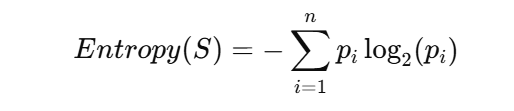

Where:

𝑆= dataset

𝑝𝑖= proportion of examples in class

𝑛= number of classes

Information Gain formula:
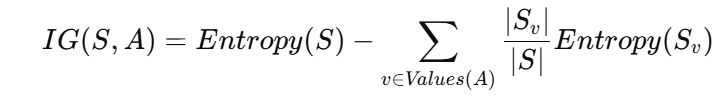

Where:

𝑆 = original dataset

𝐴 = attribute (feature) we are evaluating

𝑆𝑣 = subset of 𝑆 where feature 𝐴 has value 𝑣

∣𝑆𝑣∣/∣𝑆∣ = weight of subset in the total dataset

Interpretation:

High Information Gain ⇒ feature reduces uncertainty a lot ⇒ good feature to split on.

Low Information Gain ⇒ feature does not reduce uncertainty much ⇒ less useful for splitting.

Use in Decision Trees

Root selection:
At each node of the tree, the algorithm calculates IG for all candidate features.
The feature with the highest Information Gain is selected as the splitting feature.

Splitting:
The dataset is split into subsets based on the selected feature values.

Recursive process:
The process repeats for each subset until stopping criteria are met (e.g., all nodes are pure or maximum depth reached).

**Question 2: What is the difference between Gini Impurity and Entropy?
Hint: Directly compares the two main impurity measures, highlighting strengths,
weaknesses, and appropriate use cases.**

Ans: | Aspect             | **Gini Impurity**                                                                                                                            | **Entropy**                                                                                               |
| ------------------ | -------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------- |
| **Definition**     | Measures the probability of misclassifying a randomly chosen element if it was labeled according to the distribution of classes in the node. | Measures the uncertainty or disorder in a dataset (based on information theory).                          |
| **Formula**        | ( Gini = 1 - \sum_{i=1}^{n} p_i^2 )                                                                                                          | ( Entropy = - \sum_{i=1}^{n} p_i \log_2(p_i) )                                                            |
| **Range**          | 0 (pure) to (1 - 1/n) (max impurity for n classes)                                                                                           | 0 (pure) to (\log_2(n)) (max entropy for n classes)                                                       |
| **Sensitivity**    | Less sensitive to changes in class probabilities; faster to compute.                                                                         | More sensitive to changes in class probabilities; captures information content.                           |
| **Computation**    | Simpler, requires fewer calculations.                                                                                                        | Slightly more complex due to logarithm.                                                                   |
| **Use Case**       | Often used in **CART (Classification and Regression Trees)**. Works well for large datasets.                                                 | Commonly used in **ID3 and C4.5 algorithms**. Provides a more theoretically grounded measure of impurity. |
| **Interpretation** | Measures impurity in terms of misclassification probability.                                                                                 | Measures impurity in terms of expected information (bits) needed to classify.                             |


**Question 3:What is Pre-Pruning in Decision Trees?**

Ans: Pre-Pruning in Decision Trees

Definition:
Pre-pruning is a technique used to stop the growth of a decision tree early, before it perfectly fits the training data. The goal is to prevent overfitting and improve generalization on unseen data.

How it works:
During tree construction, the algorithm evaluates whether to split a node further based on certain criteria. If the criteria are not met, the node becomes a leaf node, and no further splits occur.

Common Pre-Pruning Criteria:


*   Maximum depth: Stop splitting when the tree reaches a specified depth.
*   Minimum samples per node: Do not split if a node has fewer than a certain number of samples.
*   Minimum information gain / impurity reduction: Only split if the feature provides enough improvement (e.g., information gain exceeds a threshold).
*   Maximum number of leaf nodes: Limit the total number of leaves in the tree.

Advantages of Pre-Pruning



*   Reduces overfitting.
*   Produces simpler and more interpretable trees.
*   Faster training as the tree is smaller.

Disadvantages

*   Risk of underfitting if the tree is stopped too early.
*   Might miss complex patterns in the data.

**Question 4:Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances (practical).
Hint: Use criterion='gini' in DecisionTreeClassifier and access .feature_importances_.**

Ans: Here's the Python code

    # Import necessary libraries
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier

    # Assume df is your dataset and 'target' is the label column
    # Example: df['target'] = 0 or 1

    # Features and target
    X = df.drop('target', axis=1)  # Replace 'target' with your target column
    y = df['target']

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize Decision Tree Classifier with Gini criterion
    dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

    # Train the classifier
    dt_classifier.fit(X_train, y_train)

    # Print feature importances
    feature_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    print("Feature Importances:")
    print(feature_importances)


Explanation:

criterion='gini' tells the tree to use Gini Impurity for splitting.

.feature_importances_ gives a numeric value representing the importance of each feature in making predictions.

Sorting them helps identify the most influential features.

**Question 5: What is a Support Vector Machine (SVM)?**

Ans: Support Vector Machine (SVM)

Definition:

SVM is a supervised machine learning algorithm used for classification and regression tasks. Its main goal is to find the best boundary (hyperplane) that separates data points of different classes with the maximum margin.

Key Concepts:

1. Hyperplane:

*   A line (in 2D), plane (in 3D), or a higher-dimensional plane that separates different classes.
*   SVM finds the hyperplane that maximizes the margin between classes.

2. Margin:

*   The distance between the hyperplane and the nearest data points from each class
*   SVM aims to maximize this margin to improve generalization.

3. Support Vectors:

*   The data points closest to the hyperplane.
*   These points are critical because the hyperplane’s position depends only on them.

4. Kernels:

*   SVM can handle non-linear separable data by transforming it into a higher-dimensional space using kernel functions such as:

    *   Linear
    *   Polynomial
    *   Radial Basis Function (RBF)
    *   Sigmoid

Advantages of SVM:

*   Works well with high-dimensional data.
*   Effective when there is a clear margin of separation between classes.
*   Can handle non-linear classification using kernels.

Disadvantages:

*   Can be slow with very large datasets.
*   Choosing the right kernel and parameters can be tricky.
*   Less effective if classes overlap heavily.


**Question 6: What is the Kernel Trick in SVM?**

Ans: Definition: The Kernel Trick is a mathematical technique used in Support Vector Machines (SVM) to handle non-linearly separable data by implicitly mapping it into a higher-dimensional space—without actually performing the transformation.

This allows SVM to find a linear boundary in that higher-dimensional space, which corresponds to a non-linear boundary in the original space.

How It Works:

In some datasets, classes cannot be separated by a straight line (linear boundary).

Instead of adding new features manually, the kernel function computes the inner product of two data points in a higher-dimensional space.

The key idea is that the transformation happens implicitly, avoiding expensive computations.

Example (Conceptual):

Instead of drawing a straight line to separate points shaped like a circle, the kernel trick maps the data into a higher dimension where a plane (linear separator) can easily divide the classes.


**Question 7: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.
Hint:Use SVC(kernel='linear') and SVC(kernel='rbf'), then compare accuracy scores after fitting on the same dataset.(Include your Python code and output in the code box below.)**

In [1]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate accuracies
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

# Print results
print("Accuracy with Linear Kernel:", acc_linear)
print("Accuracy with RBF Kernel:", acc_rbf)


Accuracy with Linear Kernel: 0.9814814814814815
Accuracy with RBF Kernel: 0.9814814814814815


**Question 8: What is the Naïve Bayes classifier, and why is it called "Naïve"?**

Ans: Definition: The Naïve Bayes classifier is a probabilistic machine learning algorithm based on Bayes’ Theorem.
It is mainly used for classification tasks such as spam detection, sentiment analysis, and text categorization.

It predicts the class of a given data point based on probabilities calculated from the training data.

Bayes’ Theorem:
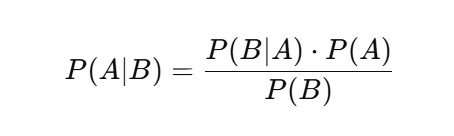

Where:

*   P(A∣B) → Probability of class 𝐴 given the evidence 𝐵(posterior probability).
*   P(B∣A) → Probability of evidence given class 𝐴 (likelihood).
*   P(A) → Prior probability of class 𝐴.
*   P(B) → Probability of the evidence (acts as normalization).

It’s called “Naïve” because the algorithm makes a strong assumption —
that all features (attributes) are independent of each other, given the class label.

Example:
In email spam detection, Naïve Bayes assumes that the occurrence of words like “offer” and “free” are independent — even though in reality, they often appear together.

This independence assumption makes the model naïve — but it still performs surprisingly well in practice, especially with text data.

**Question 9: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**

Ans: 1. Gaussian Naïve Bayes:

*   Used when input features are continuous.
*   Assumes that the continuous values associated with each class are distributed according to a Gaussian (normal) distribution.
*   Formula for likelihood:
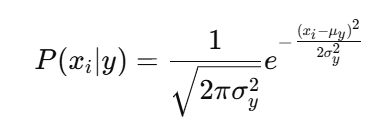

    Example: Predicting if a patient has a disease based on blood pressure or age.

2. Multinomial Naïve Bayes:

*   Used when features represent discrete counts, e.g., the number of times a word appears in a document.
*   Often used with TF-IDF or count vectors.

    Example: Predicting if an email is spam based on word frequencies.

3. Bernoulli Naïve Bayes:

*   Used for binary features (1 = present, 0 = absent).
*   Considers only the presence or absence of a feature, not how often it appears.

    Example: If a word like “discount” appears (1) or not (0) in an email to detect spam.

**Question 10: Breast Cancer Dataset. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy. Hint:Use GaussianNB() from sklearn.naive_bayes and the Breast Cancer dataset from sklearn.datasets.(Include your Python code and output in the code box below.)**

In [2]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naïve Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on test data
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Accuracy of Gaussian Naïve Bayes Classifier:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of Gaussian Naïve Bayes Classifier: 97.37 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

